The combination of vectorising approaches and classifiers:
- Bag of words & Naiive Bayes: Refer to this python.
- Spacy vectoriser & Naiive Bayes : Refer to  KE218_0_Train to tag certificate law job titles - Using Spacy.ipynb
- Spacy vectoriser & KNN : Refer to  KE218_0_Train to tag certificate law job titles - Using Spacy.ipynb

1. Overall, bag of words & Naiive Bayes performed the best ( see the confusion matrix and the metirics in the python script.)

2. The second best is Spacy vectoriser and KNN (see the confusion matrix and the metrics in KE218_0_Train to tag certificate law job titles - Using Spacy.ipynb)

3. The third best is Spacy vectoriser & Naiive Bayes (see the confusion matrix and the metrics in KE218_0_Train to tag certificate law job titles - Using Spacy.ipynb)

##### Although this time bag of words & Naiive Bayes performed best this time, depending on what data you are dealing with, this combination is not always the best.

# 

In [262]:
import pandas as pd
import numpy as np

In [1]:
import sys
import importlib
sys.path.insert(0, ".")

import sql_functions as sf
from sql_functions import *
importlib.reload(sf)

<module 'sql_functions' from 'C:\\Users\\KeikoGolden\\ComputationalLiguistics\\Annotaion\\bn_nb_s\\PythonTocheckModel\\PullRequests\\.\\sql_functions.py'>

In [2]:
import yaml
import psycopg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
from psycopg2.extras import execute_values

with open("config.yml") as f:
    config = yaml.safe_load(f)

In [3]:
conn = psycopg2.connect(
        database=config['db']['name'], 
        user=config['db']['user'], 
        host=config['db']['host'], 
        password=config['db']['password']
    )

cur = conn.cursor()

# 1. Data Collection

classification_id
- 0: Unrecognized (skill)
- 1: Organization
- 2: Law
- 3: Job title
- 4: Credential

In [266]:
command = """
select skills.skill,  
entity_types.entity_type as classification,
entity_types.id as classification_id
from entities
join entity_types on entities.entity_id = entity_types.id
join skills on skills.id = entities.skill_id
"""

entity_df = pd.read_sql(command, conn)
entity_df 

C:\Users\KeikoGolden\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,skill,classification,classification_id
0,"Advisory, Conciliation and Arbitration Service...",organization,1
1,Council for Affordable Quality Healthcare (CAQH),organization,1
2,Financial Crimes Enforcement Network (FinCEN),organization,1
3,Financial Industry Regulatory Authority (FINRA),organization,1
4,Financial Transactions and Reports Analysis Ce...,organization,1
...,...,...,...
114,US-CERT,organization,1
115,USA Patriot Act,law,2
116,Who Chemical Regulations,law,2
117,WorkSafeBC,organization,1


In [267]:
command = """
select job as skill
from jobs
"""

job_df = pd.read_sql(command, conn)
job_df 

C:\Users\KeikoGolden\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,skill
0,Staff Writer
1,Mover
2,TIG Welder
3,Model Maker
4,Chemist
...,...
3642,Reinsurance Analyst
3643,Senior Specialist - Human Design
3644,Assistant Vice President Talent Acquisition
3645,Cave Tour Guide


In [268]:
entity_df = entity_df.append(job_df)

C:\Users\KeikoGolden\AppData\Local\Temp\ipykernel_23964\4112985643.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entity_df = entity_df.append(job_df)


In [269]:
entity_df

,skill,classification,classification_id
0,"Advisory, Conciliation and Arbitration Service...",organization,1.0
1,Council for Affordable Quality Healthcare (CAQH),organization,1.0
2,Financial Crimes Enforcement Network (FinCEN),organization,1.0
3,Financial Industry Regulatory Authority (FINRA),organization,1.0
4,Financial Transactions and Reports Analysis Ce...,organization,1.0
...,...,...,...
3642,Reinsurance Analyst,NaN,NaN
3643,Senior Specialist - Human Design,NaN,NaN
3644,Assistant Vice President Talent Acquisition,NaN,NaN
3645,Cave Tour Guide,NaN,NaN


In [270]:
entity_df['classification'] = entity_df['classification'].fillna("job_title")

In [271]:
entity_df

,skill,classification,classification_id
0,"Advisory, Conciliation and Arbitration Service...",organization,1.0
1,Council for Affordable Quality Healthcare (CAQH),organization,1.0
2,Financial Crimes Enforcement Network (FinCEN),organization,1.0
3,Financial Industry Regulatory Authority (FINRA),organization,1.0
4,Financial Transactions and Reports Analysis Ce...,organization,1.0
...,...,...,...
3642,Reinsurance Analyst,job_title,NaN
3643,Senior Specialist - Human Design,job_title,NaN
3644,Assistant Vice President Talent Acquisition,job_title,NaN
3645,Cave Tour Guide,job_title,NaN


In [272]:
entity_df.classification_id.unique()

array([ 1.,  2., nan])

In [273]:
entity_df['classification_id'] = entity_df['classification_id'].fillna(3)

In [274]:
entity_df

,skill,classification,classification_id
0,"Advisory, Conciliation and Arbitration Service...",organization,1.0
1,Council for Affordable Quality Healthcare (CAQH),organization,1.0
2,Financial Crimes Enforcement Network (FinCEN),organization,1.0
3,Financial Industry Regulatory Authority (FINRA),organization,1.0
4,Financial Transactions and Reports Analysis Ce...,organization,1.0
...,...,...,...
3642,Reinsurance Analyst,job_title,3.0
3643,Senior Specialist - Human Design,job_title,3.0
3644,Assistant Vice President Talent Acquisition,job_title,3.0
3645,Cave Tour Guide,job_title,3.0


In [147]:
# Option 1 - use this when you limit the skill count at 3647 which is the same as job count.
command = """
select skill as skill
from skills
limit(3647)
"""

skill_df = pd.read_sql(command, conn)
skill_df 

C:\Users\KeikoGolden\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,skill
0,Digital Guardian Software
1,Proofpoint Software
2,Forcepoint DLP Software
3,Netskope Security Service Edge
4,Boldon James Classifier
...,...
3642,Coursework Evaluation
3643,Court Filing
3644,Court Order Enforcement
3645,Court Security


In [275]:
# Option 2 - use this when you want to use all skills from skills table.
command = """
select skill as skill
from skills
"""

skill_df = pd.read_sql(command, conn)
skill_df 

C:\Users\KeikoGolden\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,skill
0,Digital Guardian Software
1,Proofpoint Software
2,Forcepoint DLP Software
3,Netskope Security Service Edge
4,Boldon James Classifier
...,...
12680,Six Sigma Green Belt Certification
12681,Society Of Clinical Research Associates Certif...
12682,Sun Certified Business Component Developer
12683,Symantec Certified Security Practitioner


In [276]:
entity_df = entity_df.append(skill_df)
entity_df

C:\Users\KeikoGolden\AppData\Local\Temp\ipykernel_23964\910781763.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entity_df = entity_df.append(skill_df)


,skill,classification,classification_id
0,"Advisory, Conciliation and Arbitration Service...",organization,1.0
1,Council for Affordable Quality Healthcare (CAQH),organization,1.0
2,Financial Crimes Enforcement Network (FinCEN),organization,1.0
3,Financial Industry Regulatory Authority (FINRA),organization,1.0
4,Financial Transactions and Reports Analysis Ce...,organization,1.0
...,...,...,...
12680,Six Sigma Green Belt Certification,NaN,NaN
12681,Society Of Clinical Research Associates Certif...,NaN,NaN
12682,Sun Certified Business Component Developer,NaN,NaN
12683,Symantec Certified Security Practitioner,NaN,NaN


In [277]:
entity_df['classification'] = entity_df['classification'].fillna("skill")
entity_df

,skill,classification,classification_id
0,"Advisory, Conciliation and Arbitration Service...",organization,1.0
1,Council for Affordable Quality Healthcare (CAQH),organization,1.0
2,Financial Crimes Enforcement Network (FinCEN),organization,1.0
3,Financial Industry Regulatory Authority (FINRA),organization,1.0
4,Financial Transactions and Reports Analysis Ce...,organization,1.0
...,...,...,...
12680,Six Sigma Green Belt Certification,skill,NaN
12681,Society Of Clinical Research Associates Certif...,skill,NaN
12682,Sun Certified Business Component Developer,skill,NaN
12683,Symantec Certified Security Practitioner,skill,NaN


In [278]:
entity_df['classification_id'] = entity_df['classification_id'].fillna(0)
entity_df

,skill,classification,classification_id
0,"Advisory, Conciliation and Arbitration Service...",organization,1.0
1,Council for Affordable Quality Healthcare (CAQH),organization,1.0
2,Financial Crimes Enforcement Network (FinCEN),organization,1.0
3,Financial Industry Regulatory Authority (FINRA),organization,1.0
4,Financial Transactions and Reports Analysis Ce...,organization,1.0
...,...,...,...
12680,Six Sigma Green Belt Certification,skill,0.0
12681,Society Of Clinical Research Associates Certif...,skill,0.0
12682,Sun Certified Business Component Developer,skill,0.0
12683,Symantec Certified Security Practitioner,skill,0.0


In [19]:
entity_df.to_excel('training_data.xlsx')

In [123]:
conn.close()

#### Add more data on certificate and law to mach the size of data with skill and job_title

In [279]:
excel_file = pd.read_excel('C:/Users/KeikoGolden/KeikoData/credentials_laws.xlsx', sheet_name=None)

credential_df = excel_file['certificate']
law_df = excel_file['law']

In [280]:
# Remove duplicates since data was bulk colected.The shuffle by sample().
#Since certificates are clustered by regions(US federal, US state, Canada, and EU), shuffle the file couple of times.

credential_df = credential_df.drop_duplicates().sample(frac=1)
credential_df 

,skill
3103,Certified Reliability Engineer (CRE) credential
3543,Lawyer License
3908,Plumber license
1345,Certified Risk Adjustment Coder (CRC)
930,AWS Certified DevOps Engineer
...,...
861,Certified Nurse Executive (CNE)
189,Certified Information Systems Security Officer...
2977,Real Estate Appraiser License
3871,Dental hygienist license


In [281]:
#Same thing for laws which are clustered by regions(US federal, US state, Canada, and EU). shuffle the file couple of times.
law_df = law_df.drop_duplicates().sample(frac=1)
law_df 

,skill
371,Military Commissions Act of 6
3240,EU Regulation on the Single Market
3272,European Union Emissions Trading System
1038,Elementary and Secondary Education Act (ESEA)
3545,The EU Markets in Financial Instruments Direct...
...,...
1747,South Carolina H 7
1190,John Warner National Defense Authorization Act
439,Congressional Accountability Act
2062,The Hazardous Products Act


In [282]:
# append credential_df  to the training data (entity_df)
entity_df = entity_df.append(credential_df)
entity_df

C:\Users\KeikoGolden\AppData\Local\Temp\ipykernel_23964\2483701272.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entity_df = entity_df.append(credential_df)


,skill,classification,classification_id
0,"Advisory, Conciliation and Arbitration Service...",organization,1.0
1,Council for Affordable Quality Healthcare (CAQH),organization,1.0
2,Financial Crimes Enforcement Network (FinCEN),organization,1.0
3,Financial Industry Regulatory Authority (FINRA),organization,1.0
4,Financial Transactions and Reports Analysis Ce...,organization,1.0
...,...,...,...
861,Certified Nurse Executive (CNE),NaN,NaN
189,Certified Information Systems Security Officer...,NaN,NaN
2977,Real Estate Appraiser License,NaN,NaN
3871,Dental hygienist license,NaN,NaN


In [283]:
# Fill NaN in classification and classification_id for credential.
entity_df['classification'] = entity_df['classification'].fillna('certificate')
entity_df['classification_id'] = entity_df['classification_id'].fillna(4)
entity_df

,skill,classification,classification_id
0,"Advisory, Conciliation and Arbitration Service...",organization,1.0
1,Council for Affordable Quality Healthcare (CAQH),organization,1.0
2,Financial Crimes Enforcement Network (FinCEN),organization,1.0
3,Financial Industry Regulatory Authority (FINRA),organization,1.0
4,Financial Transactions and Reports Analysis Ce...,organization,1.0
...,...,...,...
861,Certified Nurse Executive (CNE),certificate,4.0
189,Certified Information Systems Security Officer...,certificate,4.0
2977,Real Estate Appraiser License,certificate,4.0
3871,Dental hygienist license,certificate,4.0


In [284]:
# append law_df to the training data (entity_df)
entity_df = entity_df.append(law_df)
entity_df

C:\Users\KeikoGolden\AppData\Local\Temp\ipykernel_23964\1401306898.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entity_df = entity_df.append(law_df)


,skill,classification,classification_id
0,"Advisory, Conciliation and Arbitration Service...",organization,1.0
1,Council for Affordable Quality Healthcare (CAQH),organization,1.0
2,Financial Crimes Enforcement Network (FinCEN),organization,1.0
3,Financial Industry Regulatory Authority (FINRA),organization,1.0
4,Financial Transactions and Reports Analysis Ce...,organization,1.0
...,...,...,...
1747,South Carolina H 7,NaN,NaN
1190,John Warner National Defense Authorization Act,NaN,NaN
439,Congressional Accountability Act,NaN,NaN
2062,The Hazardous Products Act,NaN,NaN


In [285]:
# Fill NaN in classification and classification_id for credential.
entity_df['classification'] = entity_df['classification'].fillna('law')
entity_df['classification_id'] = entity_df['classification_id'].fillna(2)
entity_df

,skill,classification,classification_id
0,"Advisory, Conciliation and Arbitration Service...",organization,1.0
1,Council for Affordable Quality Healthcare (CAQH),organization,1.0
2,Financial Crimes Enforcement Network (FinCEN),organization,1.0
3,Financial Industry Regulatory Authority (FINRA),organization,1.0
4,Financial Transactions and Reports Analysis Ce...,organization,1.0
...,...,...,...
1747,South Carolina H 7,law,2.0
1190,John Warner National Defense Authorization Act,law,2.0
439,Congressional Accountability Act,law,2.0
2062,The Hazardous Products Act,law,2.0


# 2. Create a training data

 - Skipping both Option 1 and Option 2 below: Creates training data if you don't want to make any changes to the "organization"  classified data.
 - Using Option 1 and skipping Option 2: Creates training data if you want to completely remove data classified as "organization" .
 - Skipping Option 1 and using Option 2: Creates training data with "organization" classifier replaced with "skill" classifier. (any organization tagged skill becomes a skill.)


In [90]:
# Option 1: Organizationを完全にトレーニングファイルから抜かしたい場合はこれを使う。
entity_df = entity_df[~(entity_df['classification']=='organization')]
entity_df

,skill,classification,classification_id
5,Federal Information Security Management Act (F...,law,2.0
6,General Data Protection Regulation (GDPR),law,2.0
7,Health Insurance Portability and Accountabilit...,law,2.0
8,Health Information Technology for Economic and...,law,2.0
15,National Environmental Policy Act (NEPA),law,2.0
...,...,...,...
482,Investment Advisers Act,law,2.0
485,Jones Act,law,2.0
1762,Florida SB,law,2.0
3041,The European Union Clinical Trials Regulation,law,2.0


In [286]:
# Option 2: Organizationを０に変えてスキルに組み込むにはこのスクリプトを使う。
entity_df['classification_id'] = entity_df['classification_id'].replace(1, 0)
entity_df

,skill,classification,classification_id
0,"Advisory, Conciliation and Arbitration Service...",organization,0.0
1,Council for Affordable Quality Healthcare (CAQH),organization,0.0
2,Financial Crimes Enforcement Network (FinCEN),organization,0.0
3,Financial Industry Regulatory Authority (FINRA),organization,0.0
4,Financial Transactions and Reports Analysis Ce...,organization,0.0
...,...,...,...
1747,South Carolina H 7,law,2.0
1190,John Warner National Defense Authorization Act,law,2.0
439,Congressional Accountability Act,law,2.0
2062,The Hazardous Products Act,law,2.0


In [288]:
entity_df.to_excel('training_added_all_skills.xlsx')

In [199]:
# Shuffle entity_df。sample()の括弧内に「frac =1」と記述することで、DataFrame内の行をランダムに並び替える。
entity_df = entity_df.sample(frac=1)
entity_df

,skill,classification,classification_id
3940,Nursing license,certificate,4.0
2836,Regulatory Affairs Manager,job_title,3.0
11374,Terminal Restriction Fragment Length Polymorphism,skill,0.0
11173,Symfony Framework,skill,0.0
7216,Limesurvey,skill,0.0
...,...,...,...
10768,SonarQube,skill,0.0
130,Mathematical Software,skill,0.0
359,Health Insurance Portability and Accountabilit...,law,2.0
1497,Certified Food Scientist (CFS),certificate,4.0


In [71]:
# Use this block when you have already a physical training data ready.

#entity_df = pd.read_excel('training_added_all_skills.xlsx')
#entity_df = pd.read_excel("C:/Users/KeikoGolden/KeikoData/technical_soft_functional.xlsx")
entity_df = pd.read_excel("training_tech_fun_sft_from_sql.xlsx")


In [72]:
#Split entity_df into 80 % training data and 20% testing data.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(entity_df.skill, entity_df.classification_id, test_size=0.2)

In [73]:
X_train.shape

(10050,)

In [74]:
y_train.shape

(10050,)

In [75]:
X_train.values

array(['Zip Drive', 'Microbiology', 'Lathing', ...,
       'Stereo Equipment Repair',
       'National Vehicle Crime Intelligence Service (NaVCIS)',
       'Extensible Stylesheet Language Transformations (XSLT)'],
      dtype=object)

In [76]:
# Create training data

from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()#CountVectorizeクラスのインスタンスvを生成。

X_train_cv = v.fit_transform(X_train.values)#X_trainをbag of wordsに変換。
X_train_cv#.valuesをつかうことで、X_trainをPandasのシリーズからNumpyのArrayに変換。

<10050x7464 sparse matrix of type '<class 'numpy.int64'>'
	with 23742 stored elements in Compressed Sparse Row format>

In [77]:
# Double check how many unique words in the vocaburary 9913行あり、カラム数は6122、ということは6122固有の語彙があるということになる。
X_train_cv.shape

(10050, 7464)

In [78]:
# Change to np array
X_train_np = X_train_cv.toarray()
X_train_np[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
X_train_np[:4]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# 3. Train the model

##### By MultinominalNB

In [80]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_cv, y_train)

MultinomialNB()

# 4. Evaluate performance

In [81]:
# To evaluate the performance of the model
X_test_cv = v.transform(X_test)

In [82]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_cv)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1567
           1       0.72      0.55      0.62       905
           2       0.00      0.00      0.00        41

    accuracy                           0.75      2513
   macro avg       0.49      0.48      0.48      2513
weighted avg       0.73      0.75      0.74      2513



C:\Users\KeikoGolden\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KeikoGolden\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KeikoGolden\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### @Yuri, based on these metrics, it's clear that the 0: skill tagging category is the weakest, as indicated by the largest gap between precision and recall. This gap is also reflected in the f-measure. But the threshold f-measure is 75%, so the f-measures shown in the metrics table (83%, 95%, 87%, and 90%) indicate strong performance.

##### The machine learning model for tagging certificate, law, job titles was built using bag of words instead of vectorizer, along with a Naive Bayes classifier. In my previous companies, they used to always rely on Naive Bayes. But I recently learned about another classifier called KNN through a YouTube video. I also discovered that Spacy vectorizer could be used in place of bag of words. So, I created another Python script (KE218_0_Train to tag certificate law job titles - Using Spacy.ipynb). The script utilizes both Spacy and Naive Bayes, as well as Spacy and KNN. Unfortunately, the former combination did not perform well, while the latter performed remarkably well. So, for this type of tagging task, I recommend using the Spacy and KNN combination.

In [58]:
# Now oijnt check if these skills are certificate, job_title, law.
#skills = ['Serving Food and Beverage', 'Receiving Food and Beverage Orders', 'Administering Tests and Exams',  'Model-view-controller', '.NET Framework 2', 'Administering Local Anesthetics', 'Advertising and Promotions Co-ordinator', 'Angular 6']
#skills = ['Financial Services Act']
skills = ['.NET Framework 2']

skills_count = v.transform(skills)
model.predict(skills_count)

array([0.])

Text(69.0, 0.5, 'Truth')

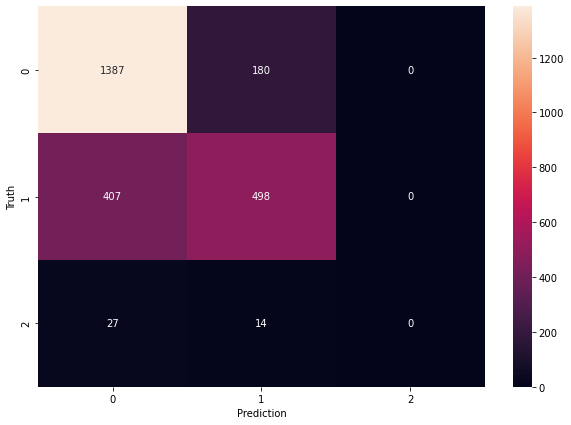

In [83]:
#Print the confusion matrix to see where or shich data need to be adjusted.

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

##### @Yuri, From this confusion matrix, you can identify where the weaknesses lie. One particular weakness is when the actual label is 0 (skill), but the machine predicts it as 2 (law), with a total of 92 instances. This allows me to determine where improvements can be made in the training data.

##### To start, I reviewed the machine tagged data  to identify patterns that are not skills, such as "certificate of...". I can add these data that start with "certificate of..." into the pool of certificate and mark them as "certificate" in the training data. Another adjustment I can make is to examine the skills in the pool of certificates. If there are any skills present, I can move them to the pool of skills and mark them as skills in the training data.

##### In my previous workplaces, this type of task (called tuning) was usually performed by each linguist before submitting their individual annotation file. Each time the training data is adjusted, the metrics and confusion matrix should be analyzed to determine whether further adjustments are necessary.

# 5. Test - Check with the list of client skills

In [23]:
client_skill_df = pd.read_excel("C:/Users/KeikoGolden/KeikoData/all_non_skyhive_skills.xlsx")
client_skill_df

,skill
0,ability to work under pressure
1,adaptability
2,adaptable
3,adobe acrobat
4,attention to detail
...,...
179225,zycus
179226,zylab
179227,zywave
179228,zyxel


In [24]:
client_skill_df = client_skill_df.dropna()

In [25]:
#non_sensical_list = non_sensical_df.non_sensical_skill.tolist()
non_sensical_list = client_skill_df.skill.tolist()
non_sensical_list

['ability to work under pressure',
 'adaptability',
 'adaptable',
 'adobe acrobat',
 'attention to detail',
 'autocad',
 'bilingual',
 'communication',
 'communication skills',
 'customer relations',
 'customer service',
 'data collection and analysis',
 'data entry',
 'detail oriented',
 'detail-oriented',
 'epic',
 'excel',
 'excellent communication and interpersonal skills',
 'excellent communication skills',
 'excellent customer service skills',
 'excellent interpersonal skills',
 'excellent oral and written communication skills',
 'excellent verbal and written communication skills',
 'excellent written and oral communication skills',
 'excellent written and verbal communication skills',
 'fast learner',
 'goal oriented',
 'high energy',
 'injections',
 'inventory management',
 'leadership',
 'leadership and management',
 'matlab',
 'medical terminology',
 'microsoft excel',
 'microsoft office',
 'microsoft office suite',
 'microsoft outlook',
 'microsoft powerpoint',
 'microsoft w

In [26]:
skills_count = v.transform(non_sensical_list)
list_of_actual = model.predict(skills_count)

In [27]:
#non_sensical_df['actural'] = list_of_actual
#non_sensical_df['actural']
client_skill_df['actural'] = list_of_actual
client_skill_df['actural']

C:\Users\KeikoGolden\AppData\Local\Temp\ipykernel_5948\1645660326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_skill_df['actural'] = list_of_actual


0         0
1         0
2         0
3         0
4         2
         ..
179225    0
179226    0
179227    0
179228    0
179229    0
Name: actural, Length: 179229, dtype: int64

In [28]:
client_skill_df

,skill,actural
0,ability to work under pressure,0
1,adaptability,0
2,adaptable,0
3,adobe acrobat,0
4,attention to detail,2
...,...,...
179225,zycus,0
179226,zylab,0
179227,zywave,0
179228,zyxel,0


In [29]:
#non_sensical_df.to_excel('tagged_by_ML6.xlsx')
#client_skill_df.to_excel('tagged_by_ML7_unapproved_all.xlsx')
client_skill_df.to_excel('tagged_by_ML8_all_non_skyhive_skills.xlsx')